Dataset Overview:


,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
0,1,56,35,62.579266,73,TV Shows,Basic,PayPal,0,7,8,0
1,2,69,15,159.714415,1,Sports,Basic,Credit Card,0,7,21,0
2,3,46,25,41.119547,36,Movies,Premium,PayPal,0,5,13,1
3,4,32,28,183.961735,35,Movies,Standard,Credit Card,0,0,27,0
4,5,60,10,87.782848,66,Movies,Standard,Bank Transfer,0,7,18,0



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Subscription_Length_Months  1000 non-null   int64  
 3   Watch_Time_Hours            1000 non-null   float64
 4   Number_of_Logins            1000 non-null   int64  
 5   Preferred_Content_Type      1000 non-null   object 
 6   Membership_Type             1000 non-null   object 
 7   Payment_Method              1000 non-null   object 
 8   Payment_Issues              1000 non-null   int64  
 9   Number_of_Complaints        1000 non-null   int64  
 10  Resolution_Time_Days        1000 non-null   int64  
 11  Churn                       1000 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 93.9+ KB


None


Summary Statistics:


,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,18.218000,100.794546,50.387000,0.154000,4.546000,15.268000,0.265000
std,288.819436,14.99103,10.177822,56.477606,28.224171,0.361129,2.919316,8.225317,0.441554
min,1.000000,18.00000,1.000000,5.036738,1.000000,0.000000,0.000000,1.000000,0.000000
25%,250.750000,31.00000,9.000000,50.383080,26.000000,0.000000,2.000000,9.000000,0.000000
50%,500.500000,44.00000,18.000000,100.234954,51.000000,0.000000,5.000000,15.000000,0.000000
75%,750.250000,56.00000,27.000000,150.445885,75.000000,0.000000,7.000000,22.000000,1.000000
max,1000.000000,69.00000,35.000000,199.944192,99.000000,1.000000,9.000000,29.000000,1.000000



Missing Values:


CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Preferred_Content_Type        0
Membership_Type               0
Payment_Method                0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Churn                         0
dtype: int64

<Figure size 1200x600 with 0 Axes>

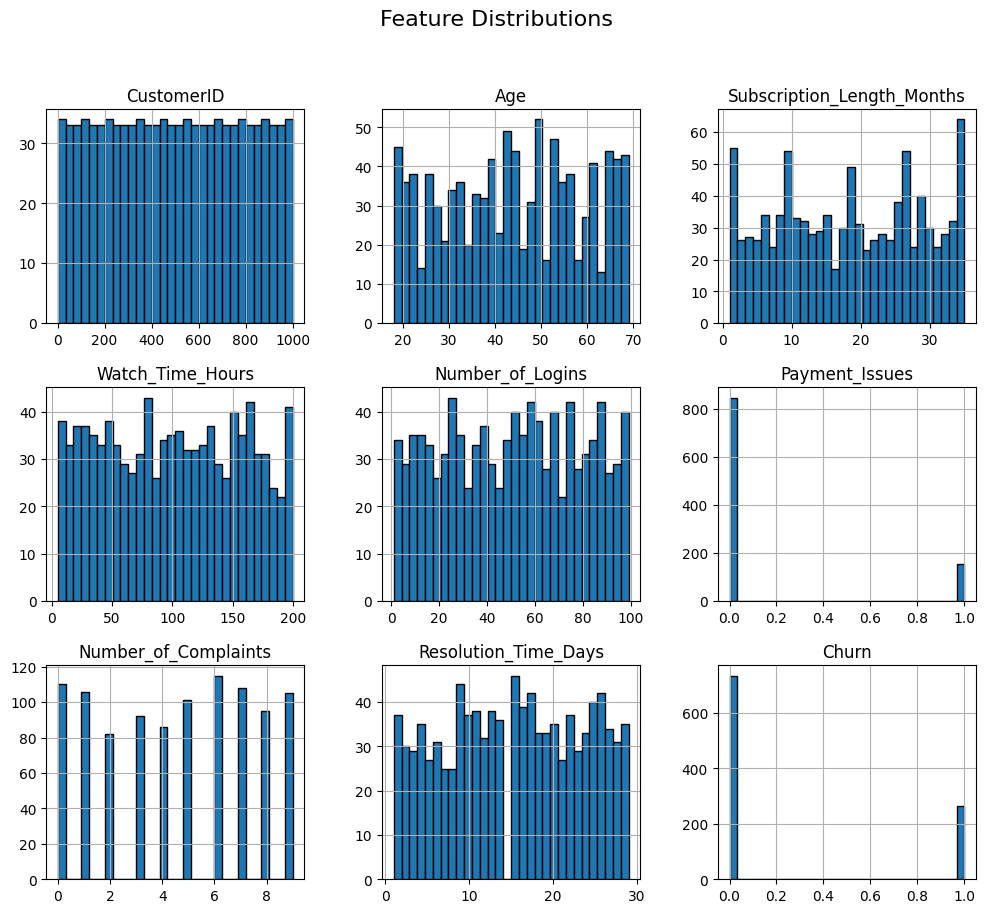

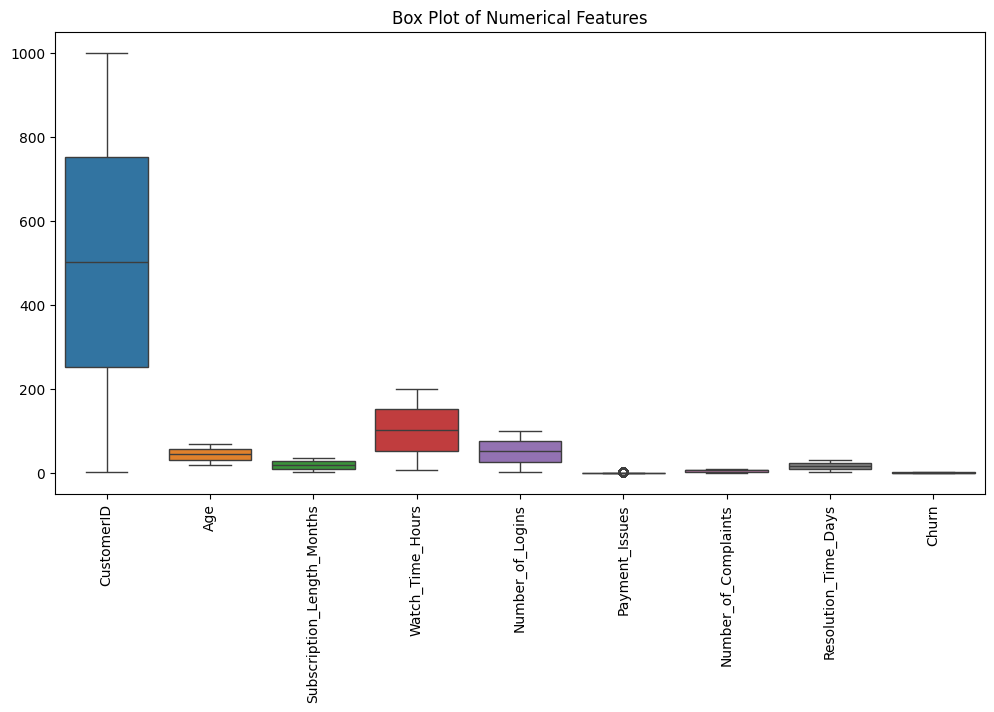

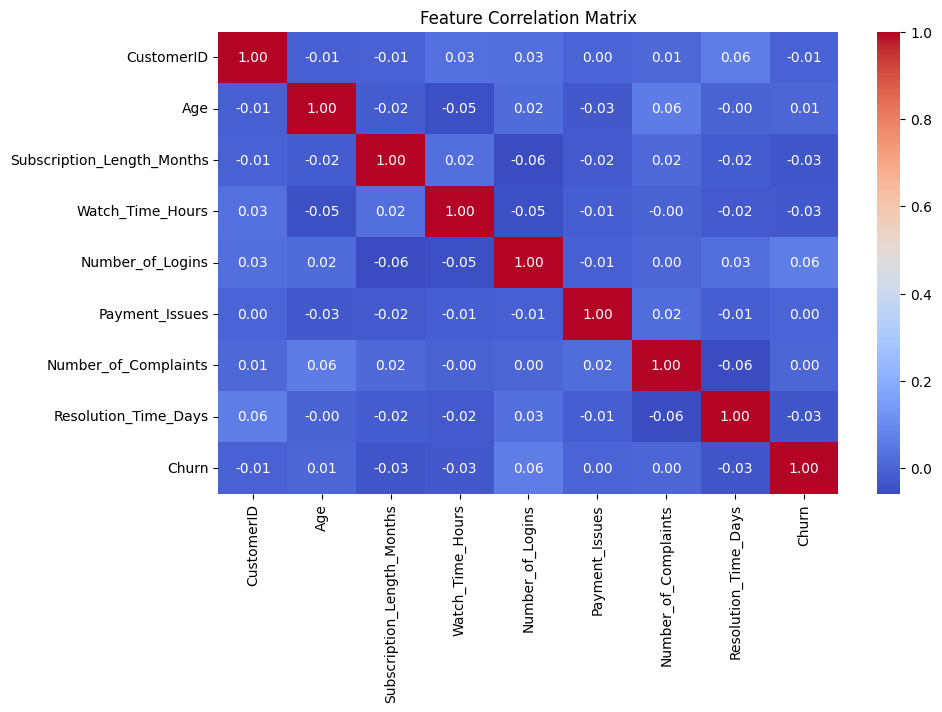


Exploratory Data Analysis Completed.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# Load dataset
df = pd.read_csv("customer_churn.csv")

# Display basic information about the dataset
print("Dataset Overview:")
display(df.head())
print("\nDataset Summary:")
display(df.info())

# Summary statistics (only numerical columns)
print("\nSummary Statistics:")
display(df.describe())

# Checking for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Handling missing values (if any) - Only for numerical columns
df.fillna(df.select_dtypes(include=np.number).median(), inplace=True)

# Visualizing distributions
plt.figure(figsize=(12, 6))
df.select_dtypes(include=np.number).hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Box plots for outlier detection (only numerical columns)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

# Checking correlations (only numerical columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

print("\nExploratory Data Analysis Completed.")


Best Parameters found: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Accuracy: 0.7100
Precision: 0.4375
Recall: 0.0614
F1 Score: 0.1077
Confusion Matrix:
[[277   9]
 [107   7]]


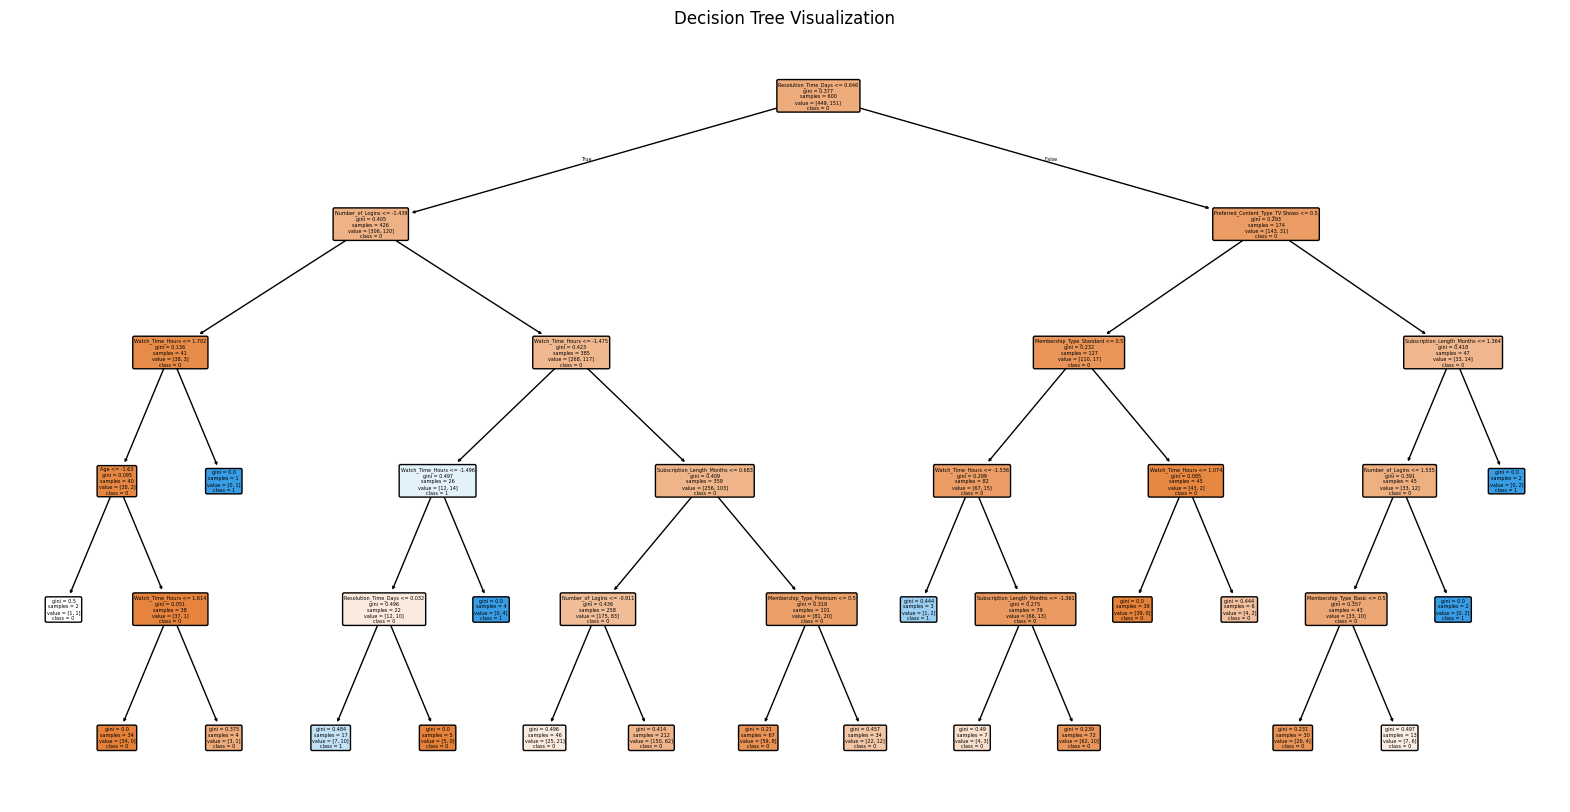

In [ ]:
#Task 2: Building a Decision Tree Classifier

# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

##
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = df.drop(columns=['Churn', 'CustomerID'])  # Features (exclude target column 'Churn' and 'CustomerID')
y = df['Churn']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=52)

# Identify categorical columns (replace with your actual categorical columns)
categorical_columns = ['Preferred_Content_Type', 'Membership_Type', 'Payment_Method']  # These are categorical columns

# Define the column transformer to apply OneHotEncoder to categorical columns and scaling to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # OneHotEncoding for categorical columns
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns)  # Scaling numerical features
    ])

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=52)

# Create a pipeline with preprocessing (OneHotEncoding + Scaling) and the classifier
#
#search
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt_classifier)
]), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', dt_classifier)
# ])

# Fit the model (same as before)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Extract the feature names for the one-hot encoded categorical features
# Apply the same transformation as in the pipeline to the training data
X_transformed = best_dt_classifier.named_steps['preprocessor'].transform(X_train)

# Get the feature names of the transformed data
# For OneHotEncoder: use get_feature_names_out to extract the new feature names
ohe_columns = best_dt_classifier.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)

# Combine the new feature names with the original numerical feature names
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
feature_names = np.concatenate([ohe_columns, numerical_columns])

# Visualize the decision tree with the correct feature names
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier.named_steps['classifier'], filled=True, feature_names=feature_names, class_names=np.unique(y).astype(str), rounded=True)
plt.title("Decision Tree Visualization")
plt.show()